In [10]:
import cv2
import os
import numpy as np
import skimage
import matplotlib.pyplot as plt
import skimage.data as data
import skimage.segmentation as seg
from skimage import filters
from skimage import draw
from skimage import color
from skimage import exposure
from skimage import io

We began by taking a videofile and reducing its dimensionality.
We extract individual frames
convert those frames to grayscale
take the average of regions of the screen
reshaped the data into a 2D matrix where the rows are the regions of the screen, the columns are timesteps, and the data is grayscale

In [11]:
def getvideo(vid):
    vidcap = cv2.VideoCapture(vid)

    success, image = vidcap.read()

    count = 1

    avg_gray_over_time = []

    while success:
        imgGray = color.rgb2gray(image)
        
        #print('manipulated frame', count)

        success, image = vidcap.read()
        count+=1 
        

        avg_gray = []
        
        first_split = np.vsplit(imgGray, 3)
        for segment in first_split:
            second_split = np.hsplit(segment, 4)
            for small_seg in second_split:
                avg_gray.append(np.average(small_seg))

        avg_gray_over_time.append(avg_gray)


    #print(avg_gray_over_time)
    print("Manipulated ", count, " frames")

    #convert list to numpy array
    gray_vs_time = np.array(avg_gray_over_time)
    return gray_vs_time



In [12]:
#scene from Alien
alien_flashes = getvideo("testBAD.mp4")


KeyboardInterrupt: 

In [13]:
#pokemon

pory = getvideo("porygons.mp4")


Manipulated  653  frames


In [22]:
#strobe
flasvid = getvideo("allflash.mp4")

Manipulated  301  frames


The goal for this function is to eventually detect changes in relative luminance within specific time frames 
see the visualizations for more notes about how we plan to do this

In [18]:
def getflashes(arr, threshold):
    frames=np.shape(arr)
    frames = frames[0]
    flash=False
    flashes=0
    rtime = 0
    for i in np.arange(24,frames,24):
        rtime=rtime+1
        if(flashes>3):

            print(flash_frames)
        flash_frames=[]
        segment = arr[i-24:i,:].T > threshold
       
        
        lum_bool=segment[0,0]
        time=0
        flashes=0

        for r in segment:
            

            if(flash==True):
                flashes=flashes+1
                flash_frames=np.append(flash_frames,rtime)
                

            flash=False
            for col in r:
                
                time=time+1
                if(col != lum_bool):
                    flash=True
                    lum_bool=col
                else:
                    flash=False
                
   
    return(flash_frames)      




A lot of work needs to be done trying a lot of different models with a lot of different values.
The output you're seeing here is saying that there were 7 flashes during second 4. 
adjusting the values changes how accurate the detection is

In [19]:
flashes1 = getflashes(pory, .3)
flashes2 = getflashes(pory, .5)
flashes3 = getflashes(pory, .7)

[13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13.]
[17. 17. 17. 17. 17. 17.]
[18. 18. 18. 18. 18. 18. 18.]
[4. 4. 4. 4. 4.]
[13. 13. 13. 13. 13. 13. 13.]
[17. 17. 17. 17. 17. 17. 17. 17. 17. 17.]
[18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18.]
[4. 4. 4. 4. 4. 4. 4.]
[18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18.]


Ideas for things to try in the future to help with classification

In [20]:
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries

This image is a 25 frame slice (about a second) the each row is a region of the screen and each column is the frame. 
In a scene with obvious flashes and not a lot of noise flashes look like distinct blobs like this.
we cannot currently make a prediction but we have made a lot of progress in exploring the data and trying to think about how we could make that prediction.
In the following cell I apply a thresholding algorithm that returns an array of true and false values. In my get flashes function I am trying to use those values to identify timestamps where that luminance changes a number of times in the second
over the next few weeks I will be trying many different ways to segment the image and tweaking the values for those algoriithms and also researching CNN


[[False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False  True False]
 [False False False  True False]
 [False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False  True False]]
[[ True  True  True  True  True False False False False False False  True
   True  True  True False False False False False False  True  True  True
   True]
 [ True  True  True  True  True False False False False False False  True
   True  True  True False False False False False False  True  True  True
   True]
 [ True  True  True  True  True False False False False False False  True
   True  True  True False False False False False False  True  True  True
   True]
 [ True  True  True  True  True False False False False False False False
   True  True  True False False False False False False  T

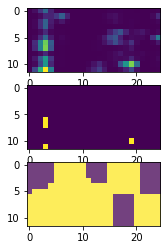

In [32]:
fig, (ax,ax1,ax2) = plt.subplots(3,1)
ax.imshow(flasvid.T[:,:25])
ax1.imshow(flasvid.T[:,:25]>.5)
print(flasvid.T[:,:5]>.5)
chan_vese = seg.chan_vese(flasvid.T[:,:25])
print(chan_vese)
ax2.imshow(chan_vese == 0, alpha=.75);

[[False False]
 [False False]]


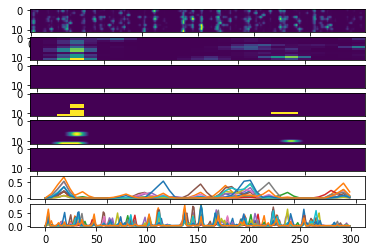

In [24]:



fig, (ax,ax2,ax3,ax4,ax5,ax6, a,b) = plt.subplots(8,1)
ax.imshow(flasvid.T,aspect='auto')
segmented = flasvid.T > .7
ax1.imshow(segmented, aspect="auto")
ax2.imshow(flasvid.T[:,:25],aspect='auto')
ax3.imshow(flasvid.T[:,:25]>.7,aspect='auto')
ax4.imshow(flasvid.T[:,:25]>.3,aspect='auto')
ax5.imshow(flasvid.T[:,:25]>.4,aspect='auto')
print(flasvid.T[:2,:2]>.7)
ax6.imshow(flasvid.T[:,:25]>.7,aspect='auto')
a.plot(np.arange(50),flasvid[0:50,:])
b.plot(np.arange(300),flasvid)

In [31]:
getflashes(flasvid, .1)

[7. 7. 7. 7.]


array([12.])

In [33]:
plotseg(flasvid.T)

NameError: name 'plotseg' is not defined

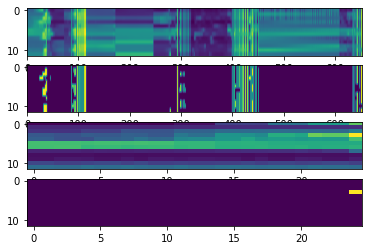

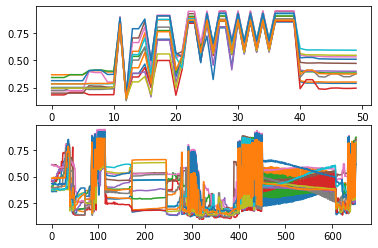

In [34]:
fig, (ax,ax1,ax2,ax3) = plt.subplots(4,1)
fig, (a,b) = plt.subplots(2,1)
ax.imshow(pory.T,aspect='auto')
segmented = pory.T > .7
ax1.imshow(segmented, aspect="auto")
ax2.imshow(pory.T[:,:25],aspect='auto')
ax3.imshow(pory.T[:,:25]>.7,aspect='auto')
a.plot(np.arange(50),pory[75:125,:])
b.plot(np.arange(652),pory)

In [ ]:
threshold = filters.threshold_local(alien_flashes.T[:,:100],51)
fig, (ax,ax1,ax2,ax3) = plt.subplots(4,1)
fig, (a,b) = plt.subplots(2,1)
ax.imshow(alien_flashes.T,aspect='auto')
segmented = alien_flashes.T > .7
ax1.imshow(segmented, aspect="auto")
ax2.imshow(alien_flashes.T[:,:25],aspect='auto')
ax3.imshow(alien_flashes.T[:,:25]>.7,aspect='auto')
ax4.imshow(alien_flashes.T[:,:100]<threshold)
a.plot(np.arange(50),alien_flashes[0:50,:])
b.plot(np.arange(8912),alien_flashes)

In [ ]:



x=np.arange(200)
#plt.plot(x,gray_vs_time[:,6])
#for i in np.arange(0,12):
  
     #ax0 = plt.plot(x,gray_vs_time[:,i])
   
plt.plot(x,alien_flashes[25:225,:])
     